In [1]:
import os
import shutil
import cv2
from skimage import io
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches

from tqdm.notebook import tqdm

In [2]:
# Get all filenames
imgs = sorted(glob('imgs_aligned/20*'))

In [3]:
# Extract number of images
N_total = len(imgs)
N_total

7777

In [10]:
# Compute mean image to know the extent
imgs_subset = [io.imread(f) for f in tqdm(imgs[::100])]

  0%|          | 0/78 [00:00<?, ?it/s]

In [5]:
subset_mean = np.mean(imgs_subset, axis=0).astype('uint8')
del imgs_subset
subset_mean.shape

(2160, 3840, 3)

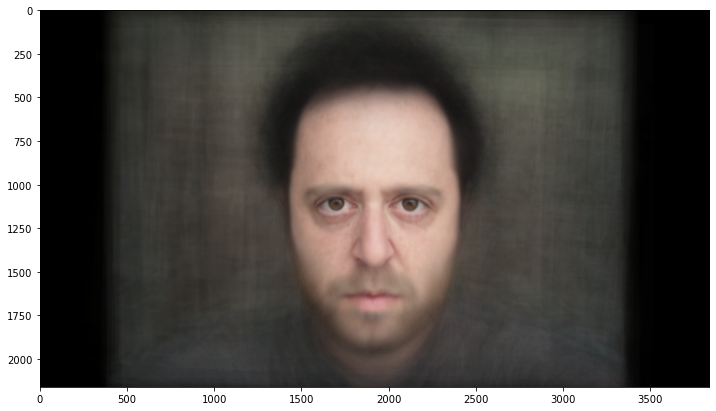

In [7]:
plt.figure(figsize=(12, 10))
plt.imshow(subset_mean);

(2000, 2000, 3)

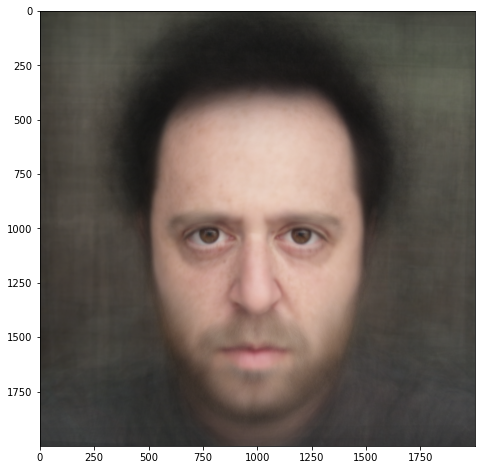

In [22]:
img_square = subset_mean[80:-80, 920:-920]
plt.figure(figsize=(8, 8))
plt.imshow(img_square);
img_square.shape

# Load a year

In [24]:
year = '2000'

In [32]:
imgs_year = [io.imread(f)[80:-80, 920:-920] for f in tqdm([i for i in imgs if f'{year}' in i])]
imgs_year = np.array(imgs_year)
imgs_year.shape

  0%|          | 0/339 [00:00<?, ?it/s]

(339, 2000, 2000, 3)

# Yearly diagonal

In [49]:
# Collect number of slithers needed
n_steps = len(imgs_year)
n_steps

339

In [50]:
# Collect number of possible diagonals
possible_diagonals = imgs_year.shape[1]*2
possible_diagonals

4000

In [51]:
# Get size of slithers
step_size = int(np.floor(possible_diagonals / n_steps))
step_size

11

In [52]:
# Compute offset to account for rounding
offset = possible_diagonals - n_steps*step_size
offset

271

In [62]:
# Create empty collage
collage = np.zeros(imgs_year.shape[1:])

for i in tqdm(range(n_steps)):
    
    # Create canvas
    canvas = np.ones(imgs_year.shape[1:-1])

    # Get slither
    idx = int(offset/2 + i* step_size - possible_diagonals/2)
    canvas = (np.tril(canvas, k=idx+step_size) - np.tril(canvas, k=idx)).astype('uint8')[..., None]

    # Load image    
    collage += imgs_year[i] * canvas

collage = collage.astype('uint8')

  0%|          | 0/339 [00:00<?, ?it/s]

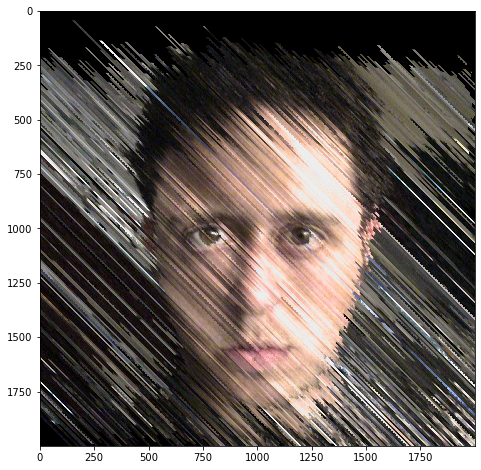

In [63]:
plt.figure(figsize=(8, 8))
plt.imshow(collage, interpolation='nearest');

In [65]:
# Save file to output
io.imsave(f'noah_year_{year}_diagonal.jpg', collage)

# Yearly squares

In [77]:
# Grid size
N = np.floor(np.sqrt(len(imgs_year))).astype('int')
N = 19
width = int(imgs_year.shape[1]/N)
height = int(imgs_year.shape[2]/N)
N, width, height

(19, 105, 105)

In [79]:
counter = np.arange(N**2)

In [86]:
new_img = []
for i in tqdm(range(N)):
    row = []
    for j in range(N):
        try:
            content = imgs_year[counter[i*N+j]]
        except:
            content = np.zeros(imgs_year[0].shape).astype('uint8')
        row.append(content[i*width:(i+1)*width, j*height:(j+1)*height])
    new_img.append(np.concatenate(row, axis=1))
collage = np.concatenate(new_img, axis=0)

  0%|          | 0/19 [00:00<?, ?it/s]

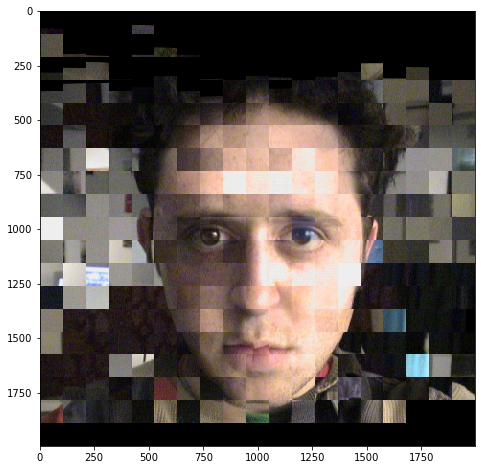

In [88]:
plt.figure(figsize=(8, 8))
plt.imshow(collage, interpolation='nearest');

In [89]:
# Save file to output
io.imsave(f'noah_year_{year}_squares.jpg', collage)

# Create images

In [101]:
for year in [str(y) for y in np.arange(2000, 2022)]:
    
    print(f'Computing year {year}.')
    
    imgs_year = [io.imread(f)[80:-80, 920:-920] for f in tqdm([i for i in imgs if f'/{year}' in i])]
    imgs_year = np.array(imgs_year)

    # Save yearly average to output
    yearly_avrage = np.mean(imgs_year, axis=0)/255
    io.imsave(f'noah_year_{year}.jpg', yearly_avrage)

    # Yearly diagonal
    # Collect number of slithers needed
    n_steps = len(imgs_year)

    # Collect number of possible diagonals
    possible_diagonals = imgs_year.shape[1]*2

    # Get size of slithers
    step_size = int(np.floor(possible_diagonals / n_steps))

    # Compute offset to account for rounding
    offset = possible_diagonals - n_steps*step_size
    
    # Create empty collage
    collage = np.zeros(imgs_year.shape[1:])

    for i in tqdm(range(n_steps)):

        # Create canvas
        canvas = np.ones(imgs_year.shape[1:-1])

        # Get slither
        idx = int(offset/2 + i* step_size - possible_diagonals/2)
        canvas = (np.tril(canvas, k=idx+step_size) - np.tril(canvas, k=idx)).astype('uint8')[..., None]

        # Load image    
        collage += imgs_year[i] * canvas

    collage = collage.astype('uint8')

    # Save file to output
    io.imsave(f'noah_year_{year}_diagonal.jpg', collage)

    # Yearly squares
    # Grid size
    N = 19
    width = int(imgs_year.shape[1]/N)
    height = int(imgs_year.shape[2]/N)
    counter = np.arange(N**2)

    new_img = []
    for i in tqdm(range(N)):
        row = []
        for j in range(N):
            try:
                content = imgs_year[counter[i*N+j]]
            except:
                content = np.zeros(imgs_year[0].shape).astype('uint8')
            row.append(content[i*width:(i+1)*width, j*height:(j+1)*height])
        new_img.append(np.concatenate(row, axis=1))
    collage = np.concatenate(new_img, axis=0)

    # Save file to output
    io.imsave(f'noah_year_{year}_squares.jpg', collage)

Computing year 2000.


  0%|          | 0/339 [00:00<?, ?it/s]

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Computing year 2001.


  0%|          | 0/362 [00:00<?, ?it/s]

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


  0%|          | 0/362 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Computing year 2002.


  0%|          | 0/363 [00:00<?, ?it/s]

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


  0%|          | 0/363 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Computing year 2003.


  0%|          | 0/349 [00:00<?, ?it/s]

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


  0%|          | 0/349 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Computing year 2004.


  0%|          | 0/366 [00:00<?, ?it/s]

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


  0%|          | 0/366 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Computing year 2005.


  0%|          | 0/365 [00:00<?, ?it/s]

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


  0%|          | 0/365 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Computing year 2006.


  0%|          | 0/365 [00:00<?, ?it/s]

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


  0%|          | 0/365 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Computing year 2007.


  0%|          | 0/365 [00:00<?, ?it/s]

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


  0%|          | 0/365 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Computing year 2008.


  0%|          | 0/366 [00:00<?, ?it/s]

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


  0%|          | 0/366 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Computing year 2009.


  0%|          | 0/364 [00:00<?, ?it/s]

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


  0%|          | 0/364 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Computing year 2010.


  0%|          | 0/364 [00:00<?, ?it/s]

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


  0%|          | 0/364 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Computing year 2011.


  0%|          | 0/364 [00:00<?, ?it/s]

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


  0%|          | 0/364 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Computing year 2012.


  0%|          | 0/365 [00:00<?, ?it/s]

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


  0%|          | 0/365 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Computing year 2013.


  0%|          | 0/365 [00:00<?, ?it/s]

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


  0%|          | 0/365 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Computing year 2014.


  0%|          | 0/365 [00:00<?, ?it/s]

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


  0%|          | 0/365 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Computing year 2015.


  0%|          | 0/364 [00:00<?, ?it/s]

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


  0%|          | 0/364 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Computing year 2016.


  0%|          | 0/365 [00:00<?, ?it/s]

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


  0%|          | 0/365 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Computing year 2017.


  0%|          | 0/364 [00:00<?, ?it/s]

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


  0%|          | 0/364 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Computing year 2018.


  0%|          | 0/364 [00:00<?, ?it/s]

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


  0%|          | 0/364 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Computing year 2019.


  0%|          | 0/364 [00:00<?, ?it/s]

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


  0%|          | 0/364 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Computing year 2020.


  0%|          | 0/366 [00:00<?, ?it/s]

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


  0%|          | 0/366 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Computing year 2021.


  0%|          | 0/163 [00:00<?, ?it/s]

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]